# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [3]:
# student details example: John S. 9812
#                       student details 1: Afik A. 7310
# (if exists)           student details 2: Adi H. 3389
# (if exists)           student details 3: Lior L. 0477
# (if exists&premitted) student details 4:

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatgpt
Goal: understanding the task
Propmpt1: ם )60 נקודות + אפשרות של עד 10 נקודות בונוס(
• ניהול הניסויים עם validation cross( 20 נקודות( - בחירת פרמוטציה המיטבית -cross-fold5-
grid search בשיטת validation
o בחירת פרמוטציה של ה- engineering Feature, מודל הלמידה ו - parameter hyper
.grid search בשיט ; תסביר לי את ההגדרות שמופיעות פה

    
Propmpt2:תסביר על feature selection

    
Propmpt3:is it recommended to drop latitude and longtitude cols? 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3:

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [9]:
import numpy as np
import scipy
import pandas as pd
from sklearn import datasets, model_selection, metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

from plotnine import ggplot, aes, geom_line, geom_point
import pygal
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import seaborn as sns


import string
import re
import math
import statistics

In [10]:
# load files
train_df = pd.read_csv('housing_train.csv')
test_df = pd.read_csv('housing_test.csv')


In [11]:
print("Train Set:")
train_df.head()

Train Set:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [12]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
print("Test Set:")
print("size: = ", len(test_df))
test_df.head()

Test Set:
size: =  4128


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


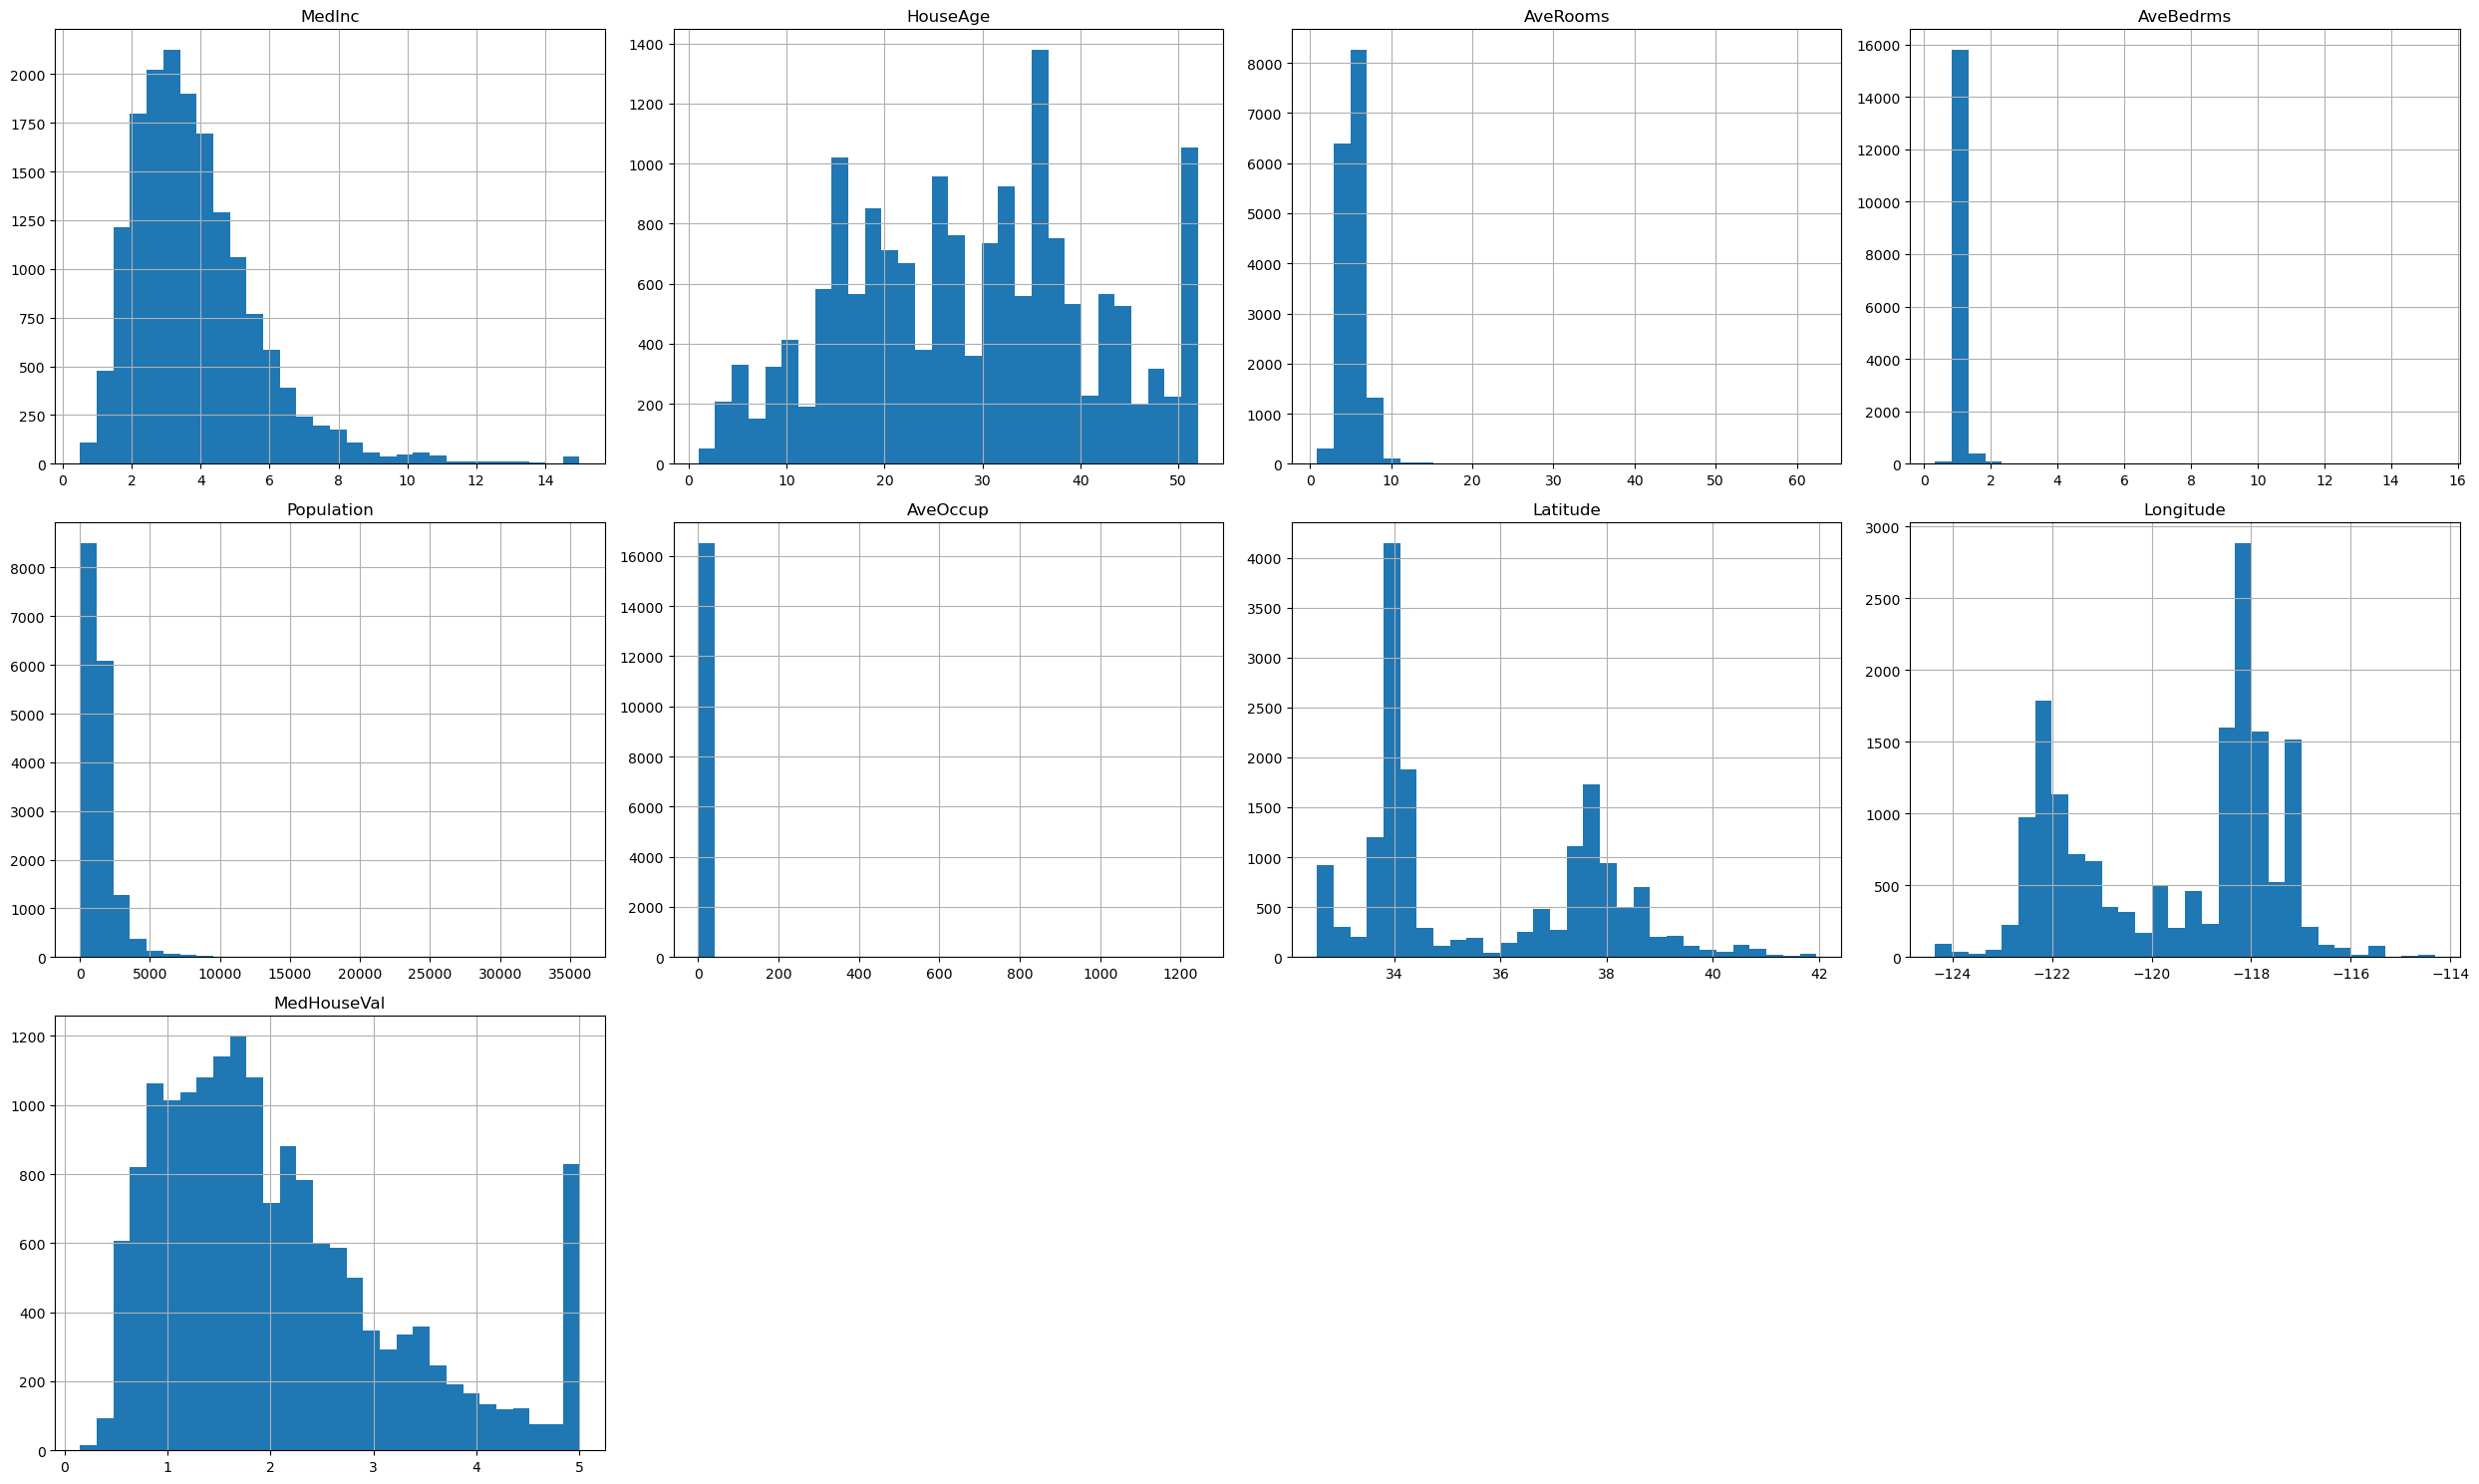

In [14]:
# This block creates histograms for all continuous features in the training dataset.
# It assumes all columns in `train_df` are continuous.
# Each feature's distribution is plotted in a grid of subplots (4 plots per row).
# Extra axes (if any) are hidden to avoid empty plots.
# Histograms use 30 bins to show frequency distribution of each feature.
# The layout is tightened for better spacing between subplots.
X = train_df.copy()
continuous_features = list(train_df.columns)


n_plots =len(continuous_features)
plot_in_line = 4
plot_lines = n_plots/plot_in_line + 1

fig, axes = plt.subplots((int)(plot_lines) , plot_in_line, figsize=(25,15))
for i, ax in enumerate(axes.ravel()):
    if i >= n_plots:
        ax.set_visible(False)
        continue

    X.hist(column=continuous_features[i], ax=ax, bins=30)
plt.tight_layout()
#Purpose: Visualize all the features in the dataframe
#Insight: all the features are continuous which is good for the linear regression model

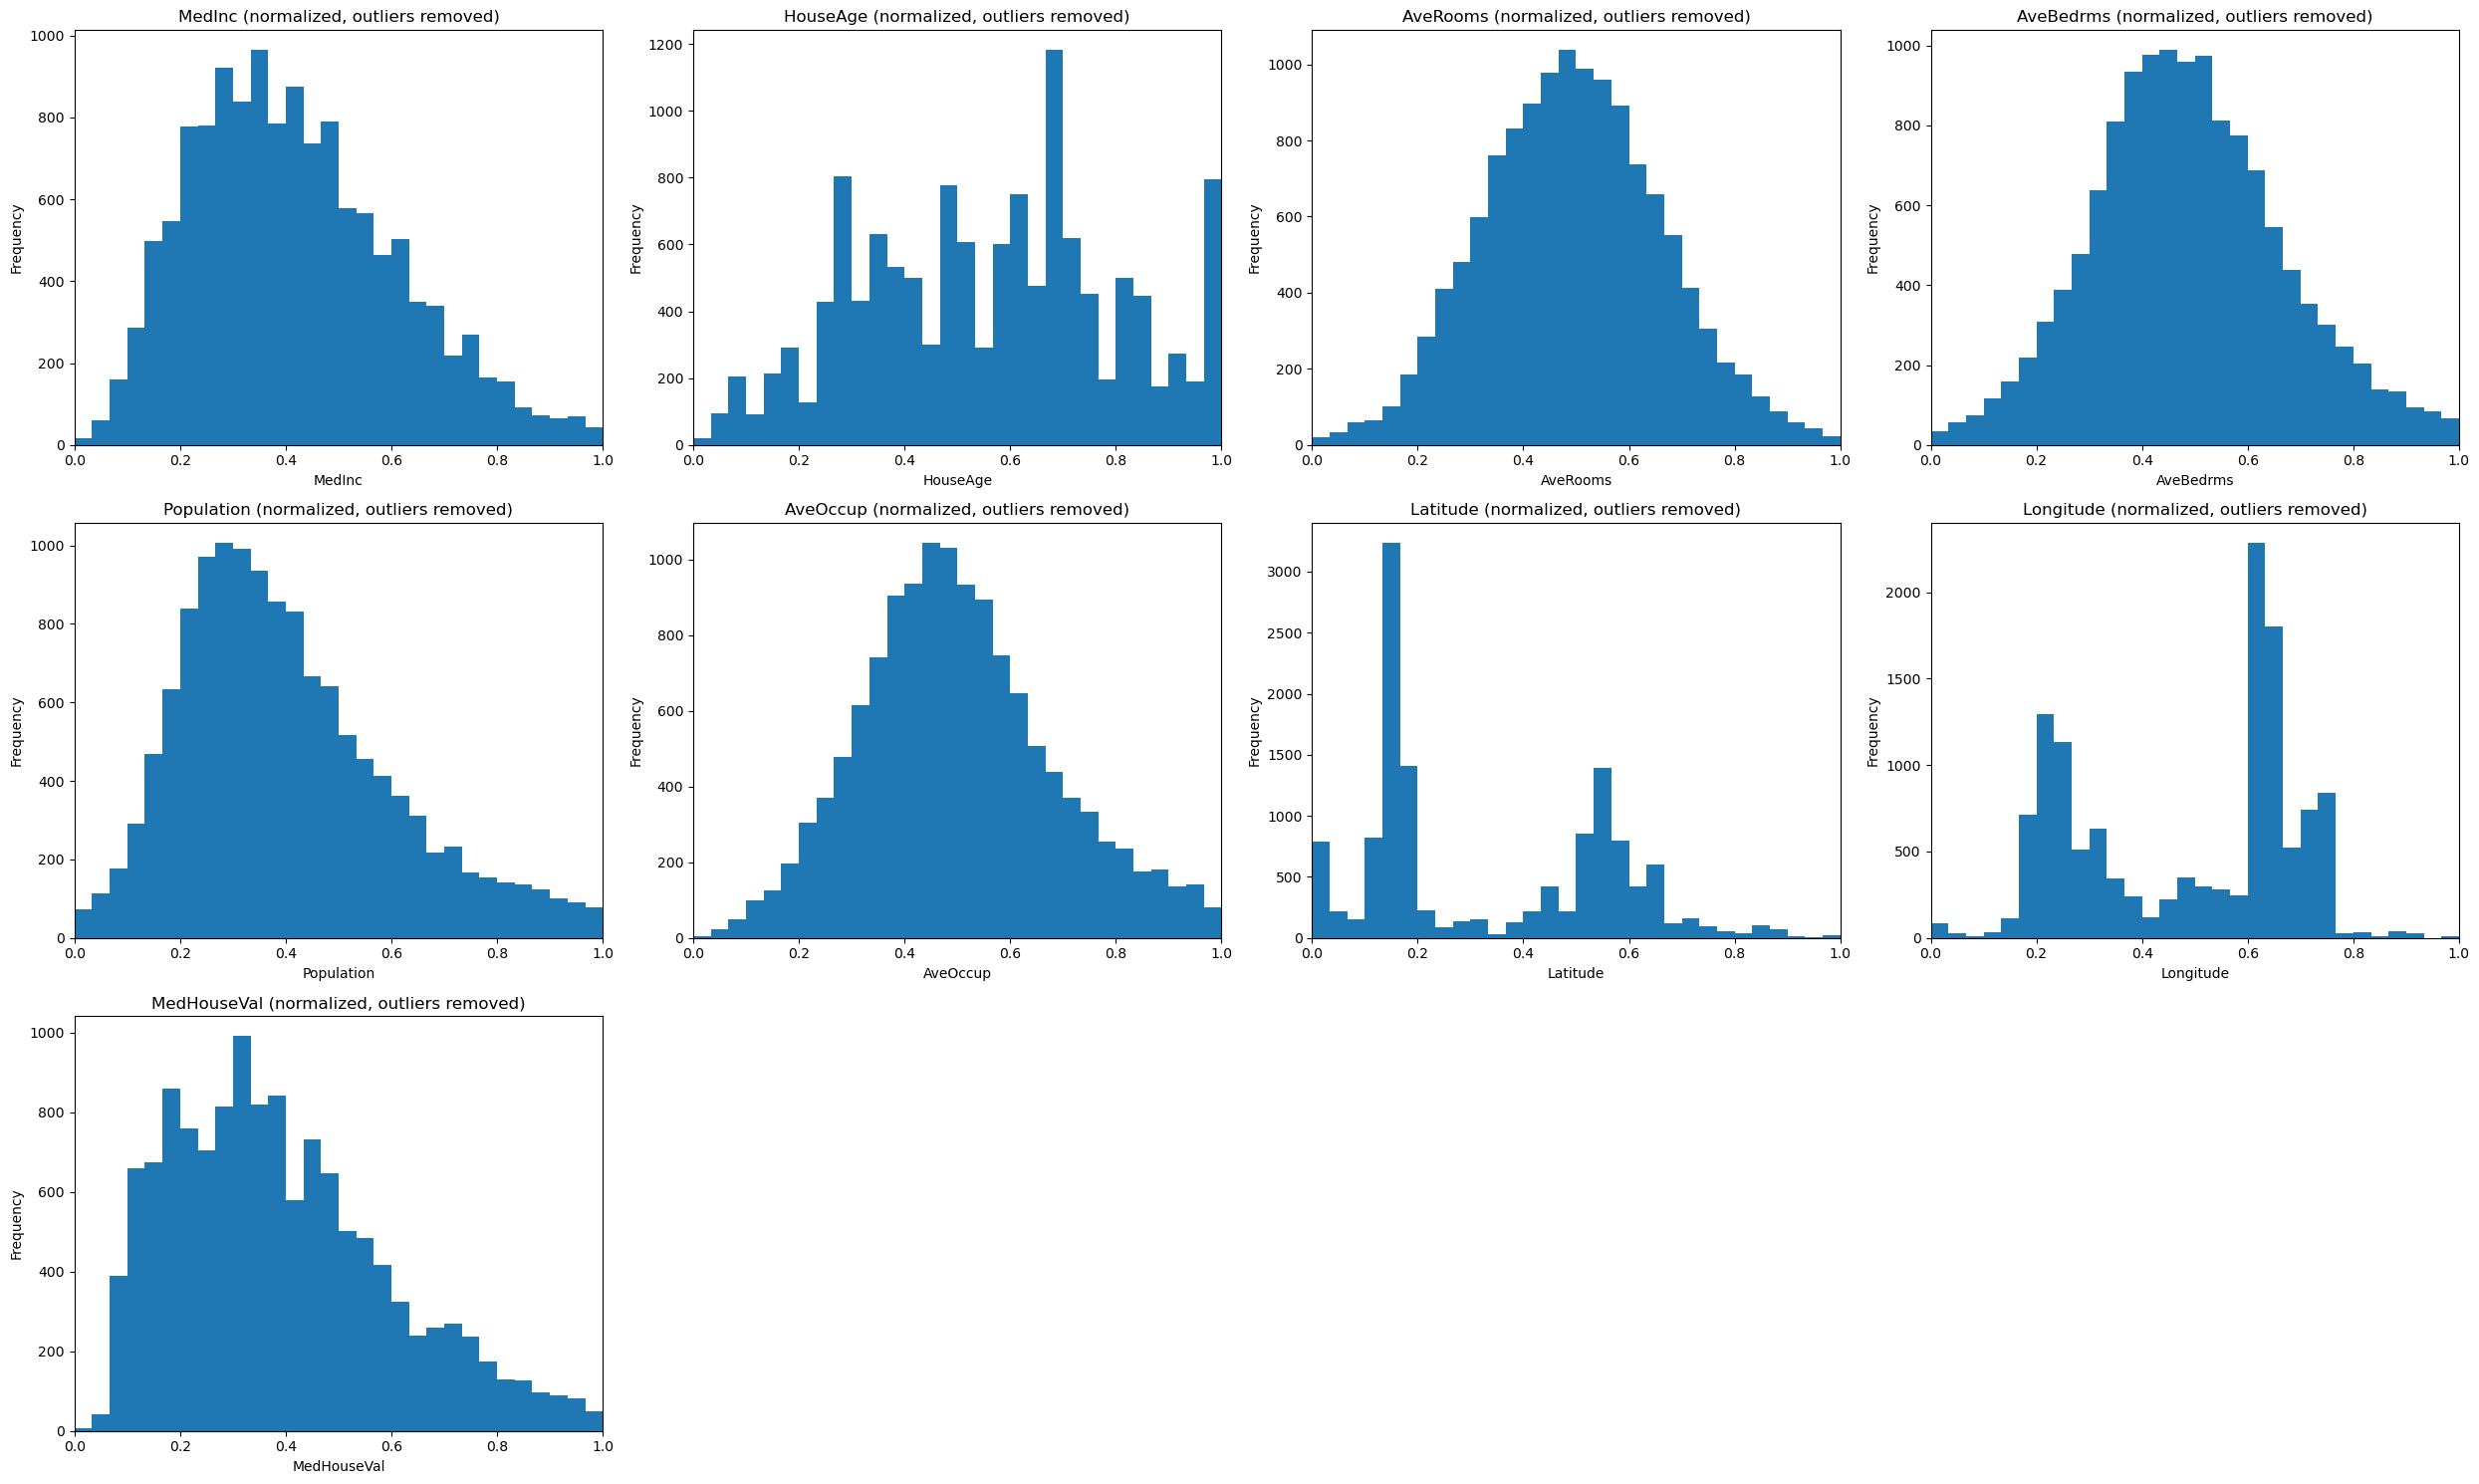

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Function to remove outliers using IQR and normalize
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Copy and select numeric features
X = train_df.copy()
continuous_features = X.select_dtypes(include='number').columns.tolist()

# Remove outliers
X_clean = remove_outliers_iqr(X, continuous_features)

# Normalize the cleaned data
scaler = MinMaxScaler()
X_clean[continuous_features] = scaler.fit_transform(X_clean[continuous_features])

# Plot histograms
n_plots = len(continuous_features)
plot_in_line = 4
plot_lines = int(np.ceil(n_plots / plot_in_line))

fig, axes = plt.subplots(plot_lines, plot_in_line, figsize=(25, 5 * plot_lines))
axes = axes.reshape(-1)

for i, ax in enumerate(axes):
    if i >= n_plots:
        ax.set_visible(False)
        continue
    X_clean.hist(column=continuous_features[i], ax=ax, bins=30, grid=False)
    ax.set_title(f"{continuous_features[i]} (normalized, outliers removed)")
    ax.set_xlabel(continuous_features[i])
    ax.set_ylabel("Frequency")
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()
#Purpose: Visualize all the features in the dataframe, normalized and without outliers this time.
#Insight: all the features are continuous which is good for the linear regression model

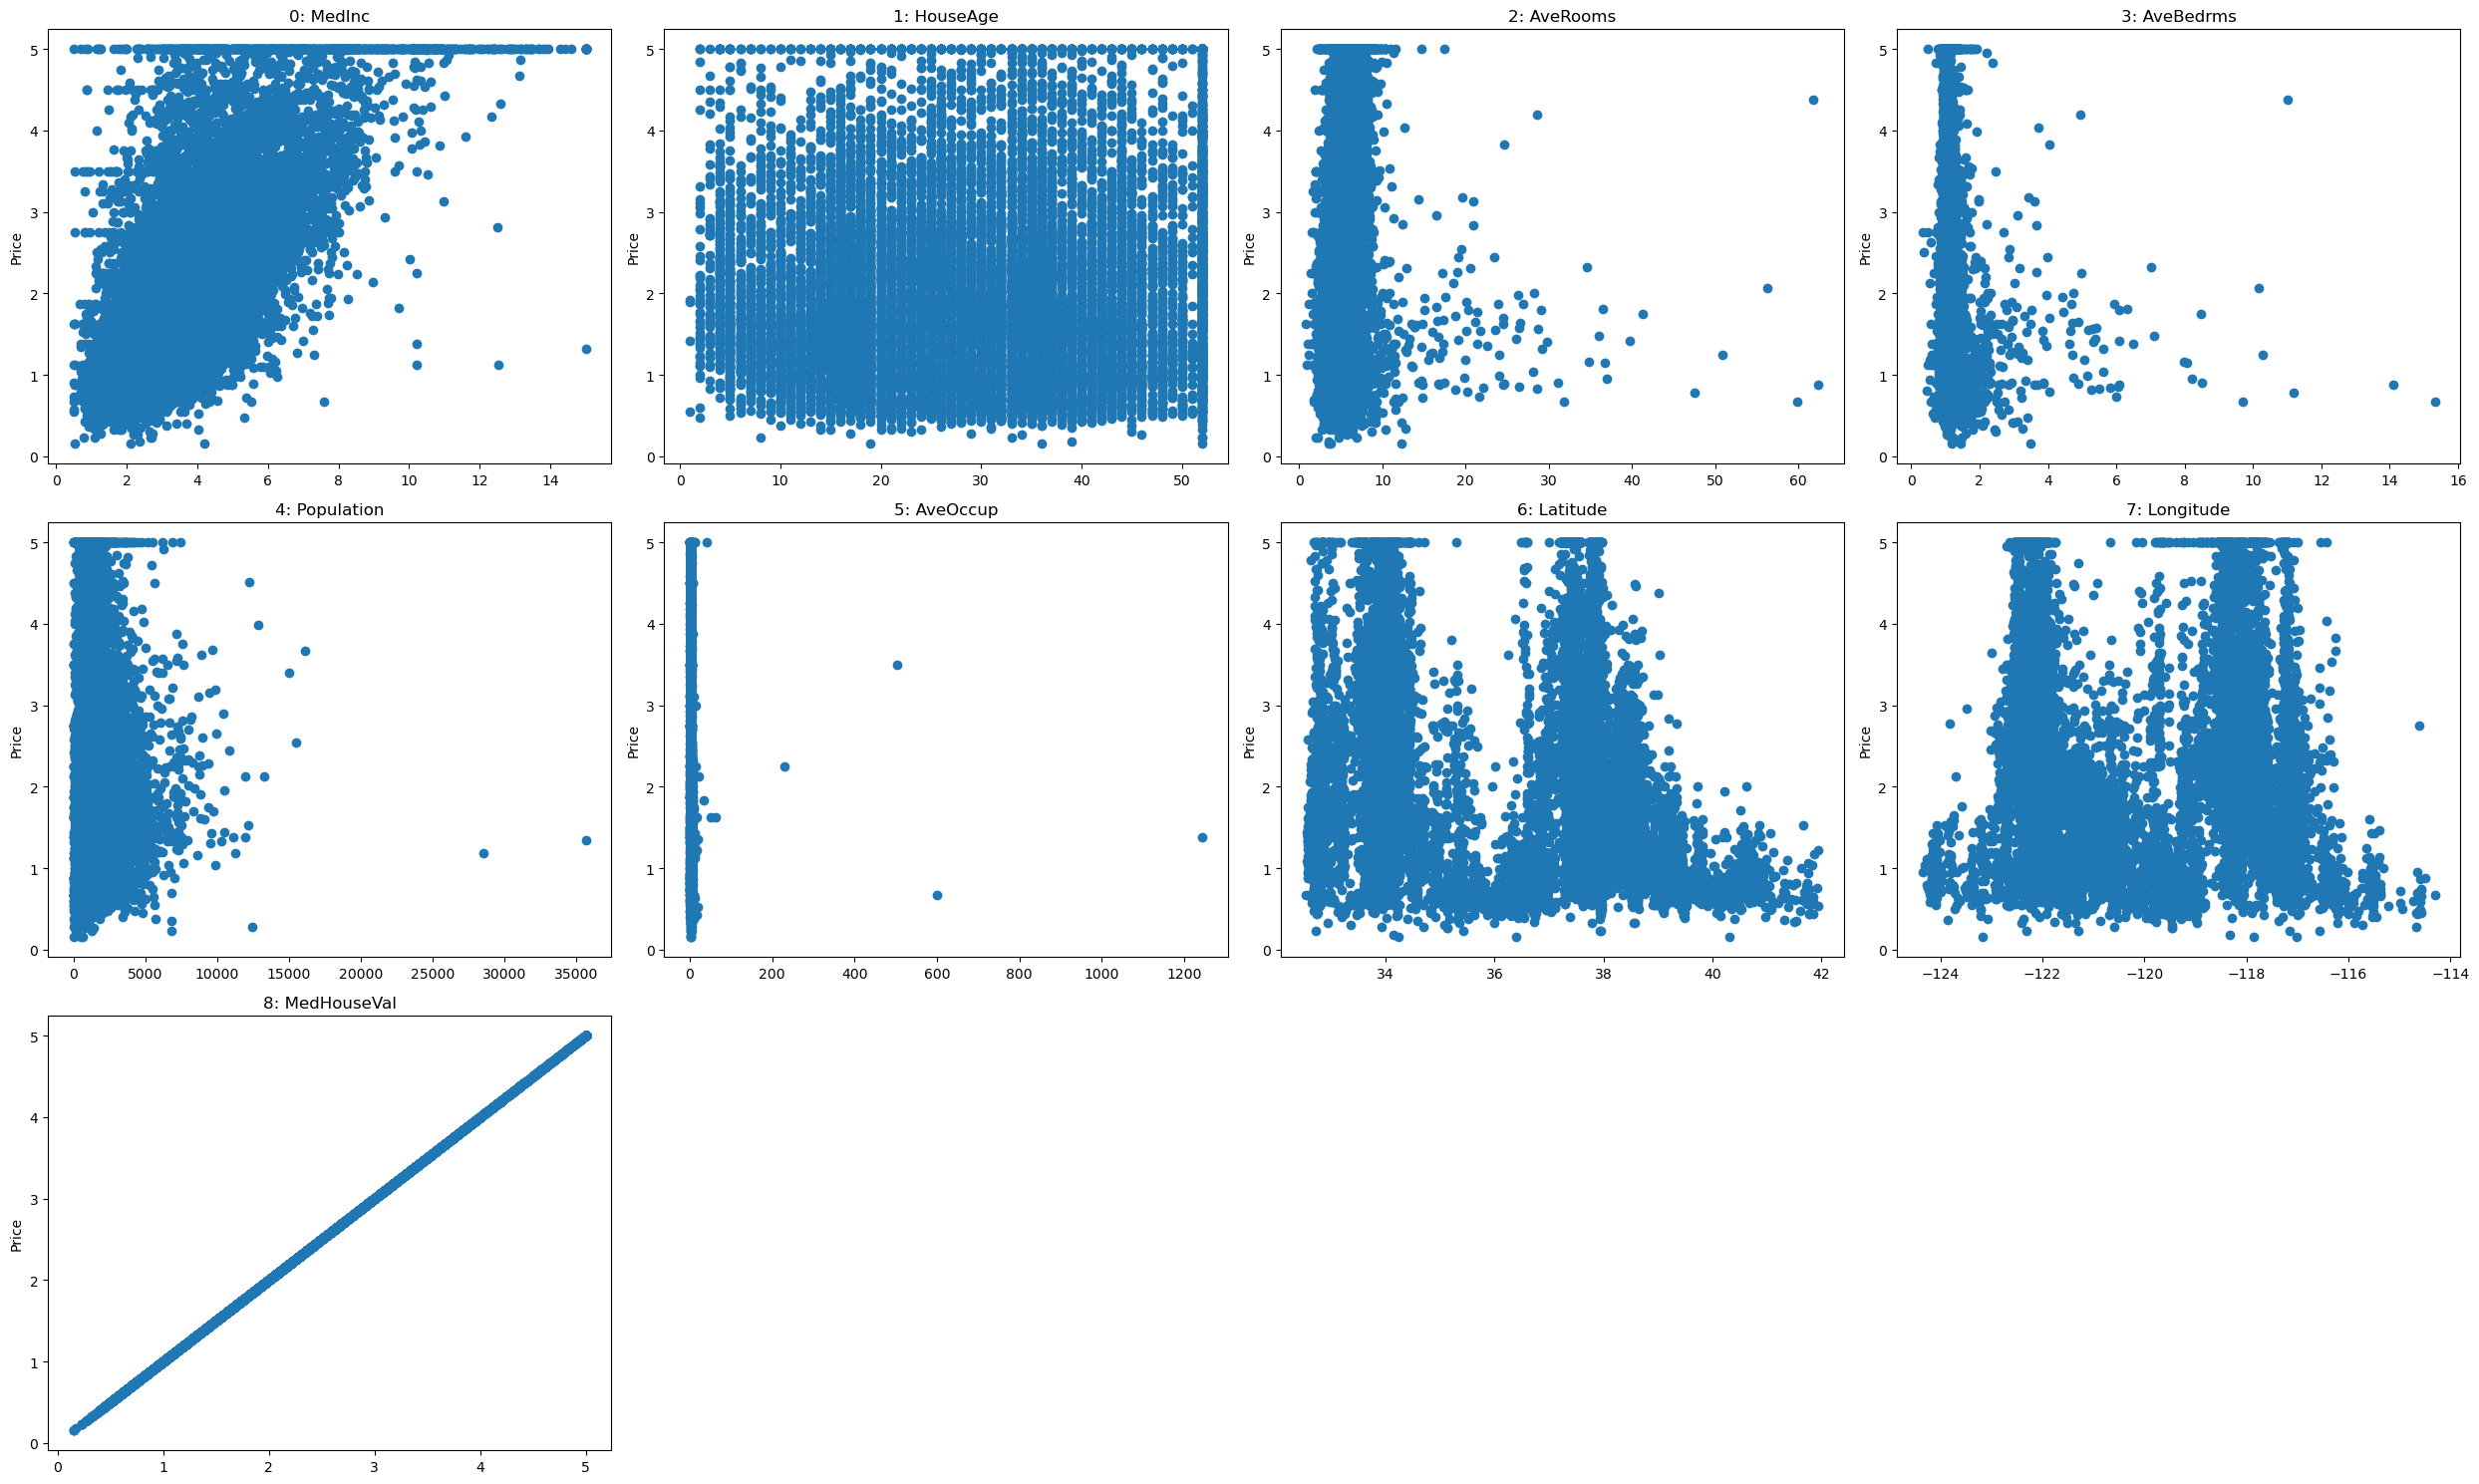

In [16]:
# Plot 2: Scatter plot - each dataset field vs. Median House Value

X = train_df.copy()
y = train_df.MedHouseVal
continuous_features = list(train_df.columns)

n_plots =len(continuous_features)
plot_in_line = 4
plot_lines = n_plots/plot_in_line + 1

fig, axes = plt.subplots((int)(plot_lines) , plot_in_line, figsize=(25,15))
for i, ax in enumerate(axes.ravel()):
    if i >= n_plots:
        ax.set_visible(False)
        continue

    X_col = X[continuous_features[i]]

    ax.scatter(X_col, y, alpha=1)
    ax.set_title("{}: {}".format(i, continuous_features[i]))
    ax.set_ylabel("Price")
plt.tight_layout()
#Purpose: Visualize the relationship between household income and home value.
#Insight: There's a positive trend—higher income areas tend to have higher median house values.

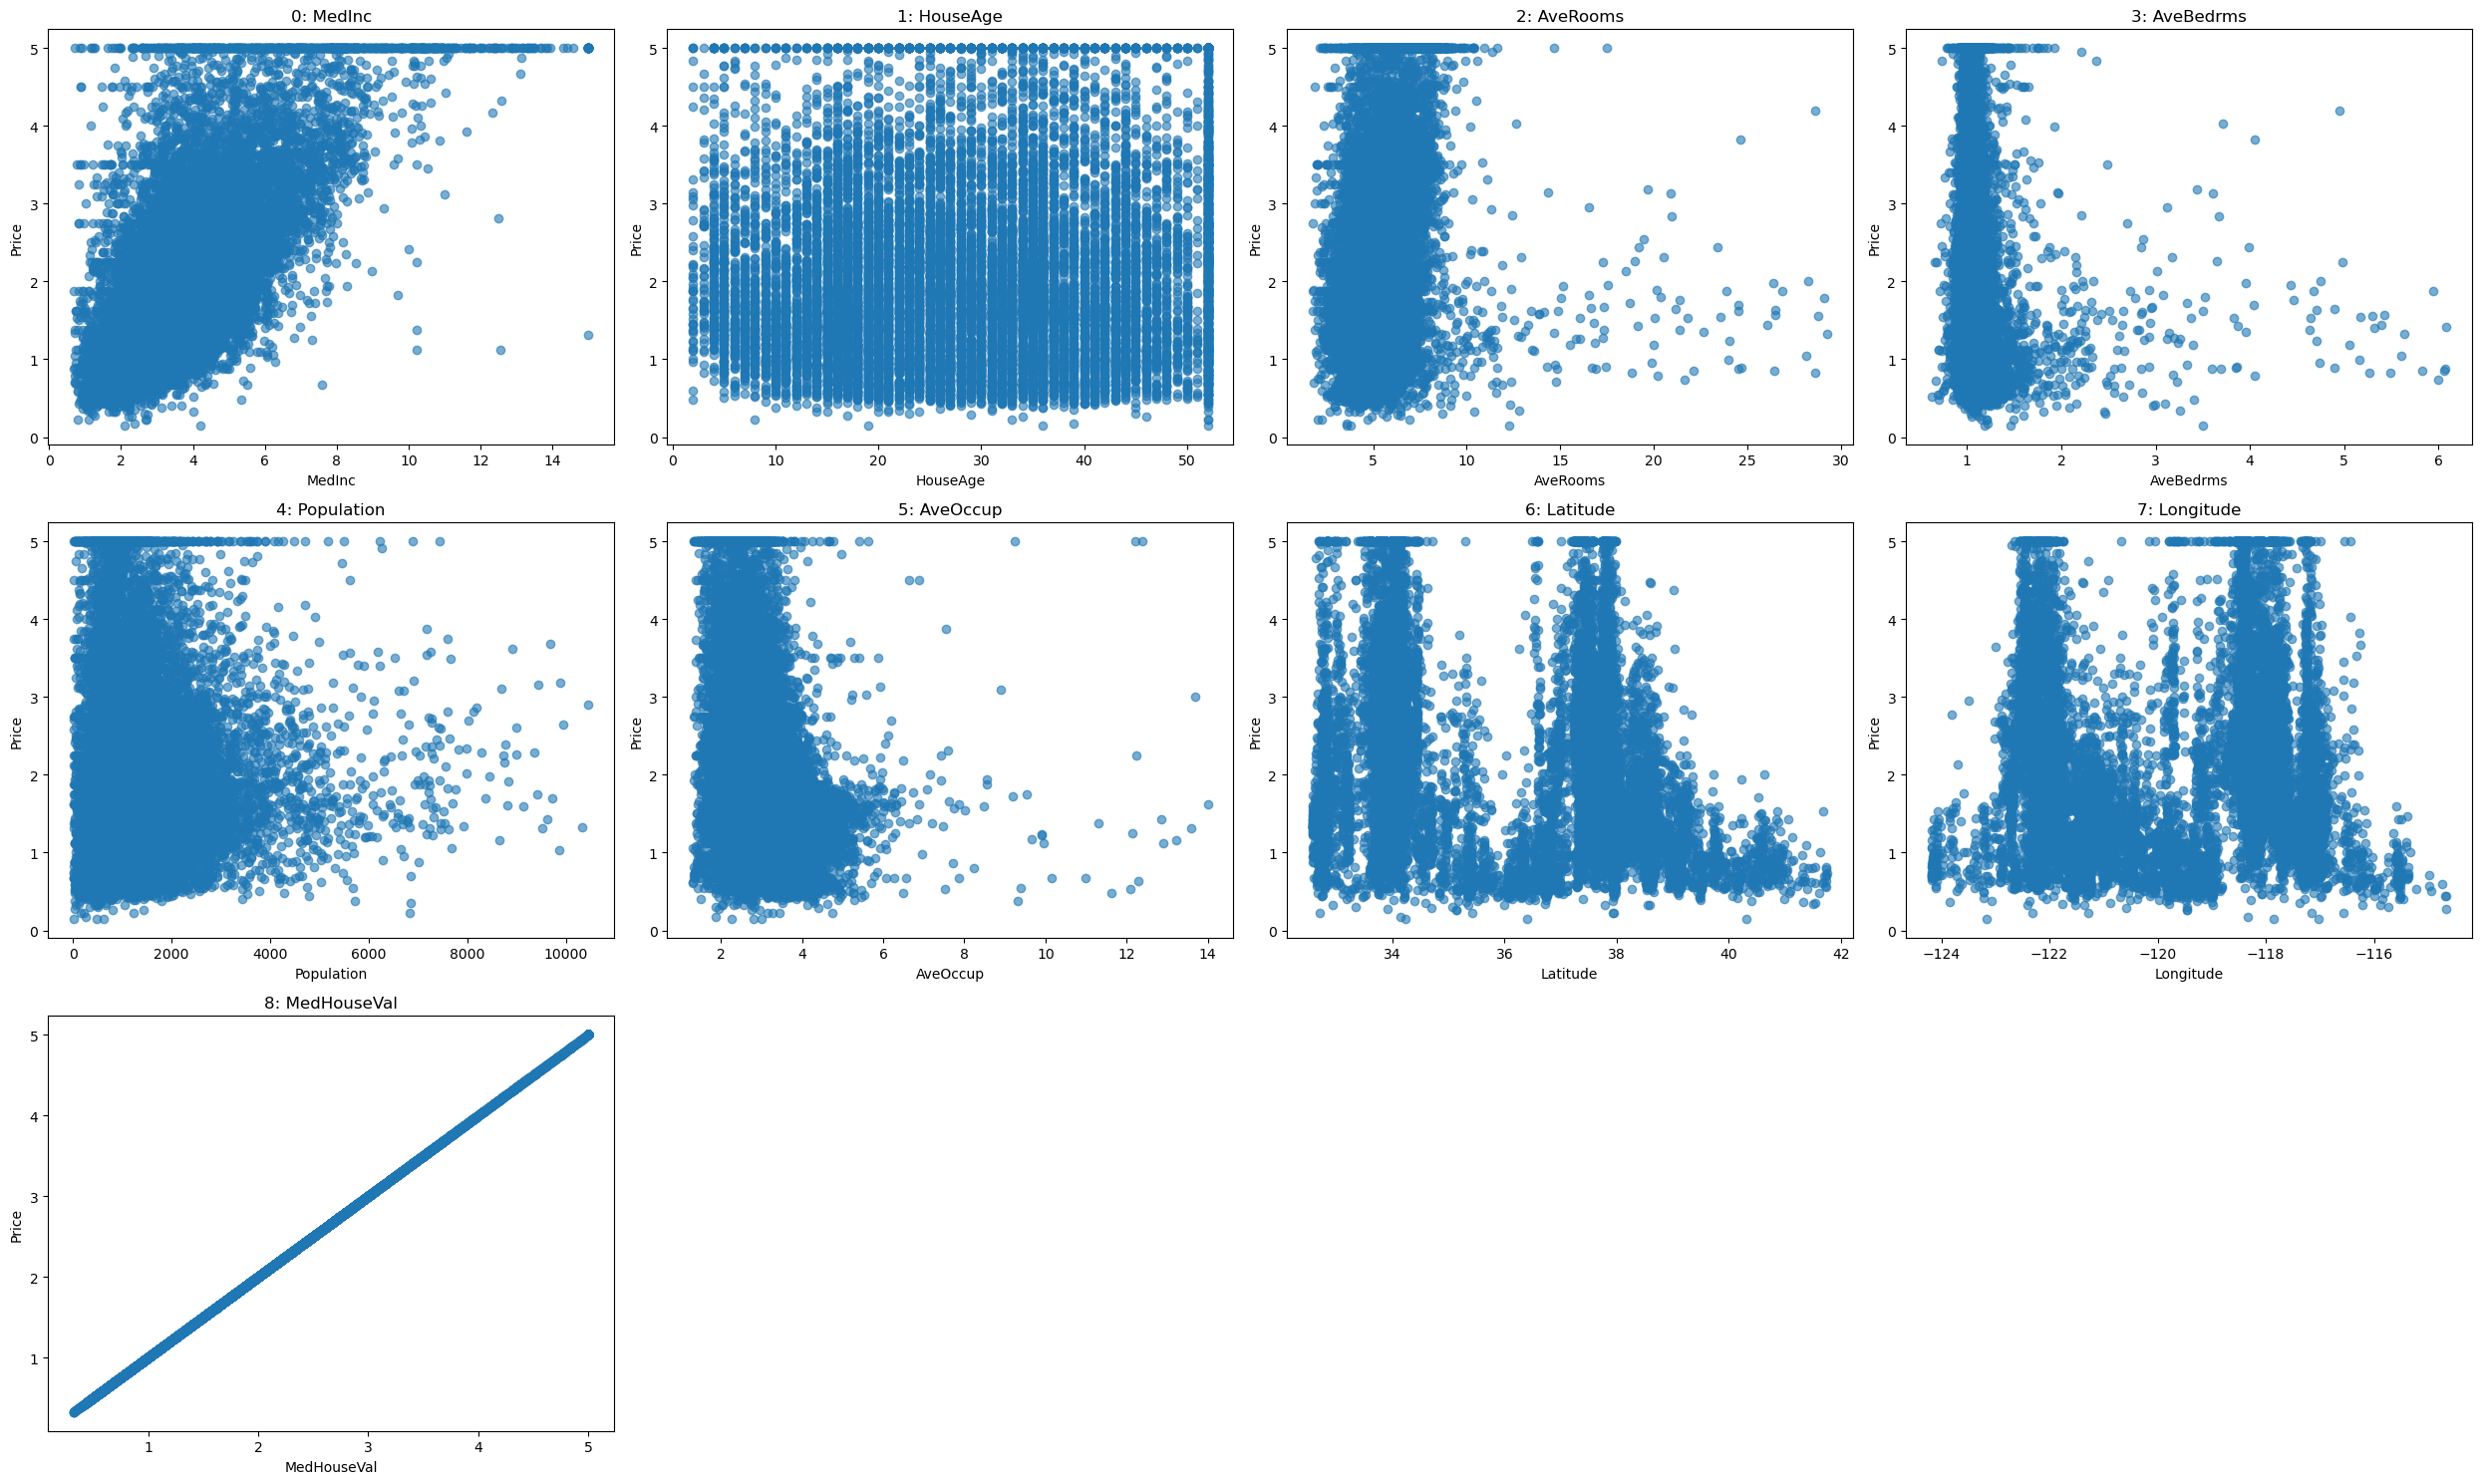

In [17]:
## Plot 2.1:  each dataset field vs. Median House Value scatterplot, remove outliers for scatterplot
X = train_df.copy()
y = train_df["MedHouseVal"]
continuous_features = list(train_df.columns)

n_plots = len(continuous_features)
plot_in_line = 4
plot_lines = n_plots // plot_in_line + 1

fig, axes = plt.subplots(int(plot_lines), plot_in_line, figsize=(25, 15))

for i, ax in enumerate(axes.ravel()):
    if i >= n_plots:
        ax.set_visible(False)
        continue

    feature = continuous_features[i]
    X_col = X[feature]

    # Remove outliers for plotting
    if X_col.nunique() > 10:
        lower = X_col.quantile(0.001)
        upper = X_col.quantile(0.999)
        mask = (X_col >= lower) & (X_col <= upper)
        X_col_filtered = X_col[mask]
        y_filtered = y[mask]
    else:
        X_col_filtered = X_col
        y_filtered = y

    ax.scatter(X_col_filtered, y_filtered, alpha=0.6)
    ax.set_title(f"{i}: {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()
#Purpose: Visualize the relationship between household income and home value in higher resolution.
#insight: More expencive houses are higher represented in smaller Population locations
#AveOccup is higher in houses price range [1M$-2M$]

In [18]:
# Table: Average house value by binned house age
train_df['HouseAgeBin'] = pd.cut(train_df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10','11-20','21-30','31-40','41-50','51-60'])
avg_val_by_age = train_df.groupby('HouseAgeBin')['MedHouseVal'].mean().reset_index()
avg_val_by_age

#Purpose: Investigate how age of buildings affects house value.
#Insight:older buildings (51–60 years) have the highest average value.

C:\Users\afik3\AppData\Local\Temp\ipykernel_4968\2338780054.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,HouseAgeBin,MedHouseVal
0,0-10,2.009635
1,11-20,1.902579
2,21-30,2.060587
3,31-40,2.062222
4,41-50,2.078012
5,51-60,2.720314


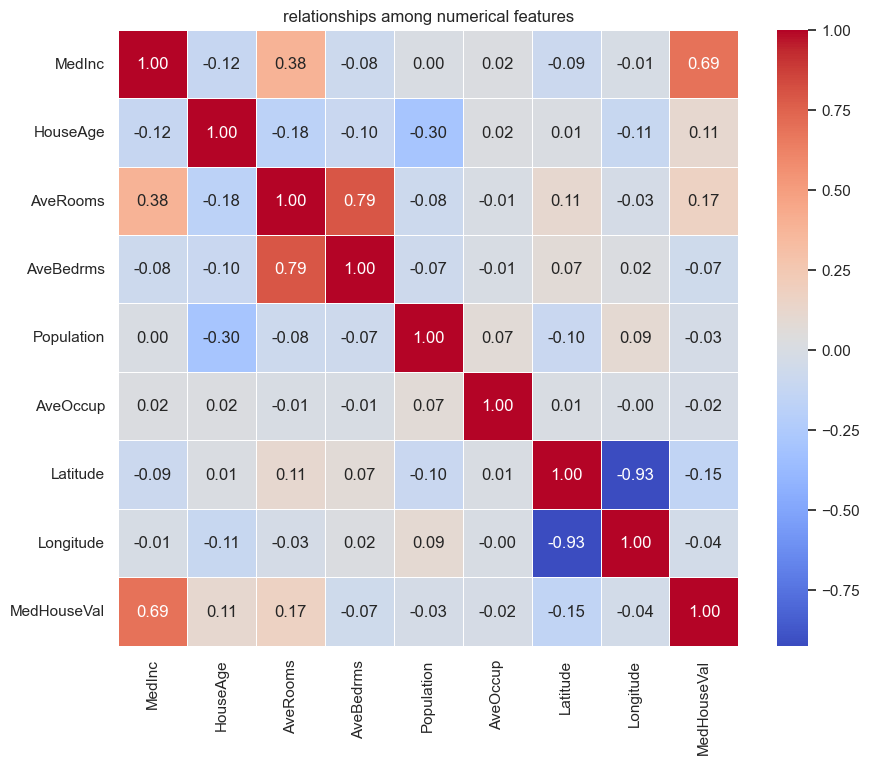

In [19]:
# Plot 3: Heat-map - relationships among all numerical features

sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('relationships among numerical features')
plt.show()


#Purpose: Reveal relationships among numerical features.
#Insight: MedInc (income) has a strong positive correlation with MedHouseVal.

## Part 3 - Experiments
You could add as many code cells as needed

In [21]:
# We compared three versions of the MedInc feature — raw, log-transformed, and standardized
# using a linear regression model with 5-fold cross-validation to evaluate which transformation yields the best performance.
# The results showed that the raw MedInc achieved the lowest mean squared error (MSE), indicating it provides the best fit for the model.

X1 = train_df[['MedInc']]
X2 = np.log1p(train_df[['MedInc']])
X3 = StandardScaler().fit_transform(train_df[['MedInc']])
y = train_df['MedHouseVal']

model = LinearRegression()
score1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_squared_error').mean()
score2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_squared_error').mean()
score3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_squared_error').mean()

print("Raw MedInc:", -score1)
print("Log MedInc:", -score2)
print("Scaled MedInc:", -score3)
# the best model is score2 - raw MedInc
# Raw MedInc: 0.7017340790219933
# Log MedInc: 0.7342691314827373
# Scaled MedInc: 0.7017340790219933

Raw MedInc: 0.7017340790219933
Log MedInc: 0.7342691314827373
Scaled MedInc: 0.7017340790219933


In [22]:
# we compared three versions of HouseAge feature - raw, catagorical(one-hot) and average bin
# using a linear regression model with 5-fold cross-validation to which transformation yields the best performance.
# the results showed that the catagorical bins HouseAge achieved the lowest MSE, indicating it provides the best fit for the model
# but we fear it will harm the fit section, so we are using average version

y = train_df['MedHouseVal']
X_raw = train_df[['HouseAge']]
model = LinearRegression()
score_raw = -cross_val_score(model, X_raw, y, cv=5, scoring='neg_mean_squared_error').mean()
bin_avg = train_df.groupby('HouseAgeBin')['HouseAge'].mean()
train_df['HouseAgeBin_avg'] = train_df['HouseAgeBin'].map(bin_avg)
X_avg = train_df[['HouseAgeBin_avg']]
score_avg = -cross_val_score(model, X_avg, y, cv=5, scoring='neg_mean_squared_error').mean()
X_cat = pd.get_dummies(train_df['HouseAgeBin'])
score_cat = -cross_val_score(model, X_cat, y, cv=5, scoring='neg_mean_squared_error').mean()
train_df = train_df.drop(columns=['HouseAgeBin'])
print(f"Raw HouseAge: {score_raw:.4f}")
print(f"Averaged Bin: {score_avg:.4f}")
print(f"Categorical Bin (one-hot): {score_cat:.4f}")
train_df.head()

Raw HouseAge: 1.3098
Averaged Bin: 1.3096
Categorical Bin (one-hot): 1.2929


C:\Users\afik3\AppData\Local\Temp\ipykernel_4968\4253221772.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAgeBin_avg
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500,44.689202
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883,6.718799
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536,16.139646
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810,25.587500
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250,25.587500


**FEATURE ENGENEERING**


In [24]:
# creating a new feature which is more meaningful than the original features
# If the ratio is high — it means there are many rooms but few bedrooms → this may indicate a house with large spaces (living room, kitchen, office, etc.).
# If the ratio is low — it likely indicates a small or crowded house, where most of the rooms are bedrooms.
train_df['Rooms_per_Bedroom'] = train_df['AveRooms'] / (train_df['AveBedrms'] + 1e-5)


# creating a new feature as well.
# If the ratio is high: it likely means there are many people living across a wide distribution of housing units — possibly a dense but well-planned area.
# If the ratio is low: it may indicate many people living in a single unit — meaning high housing density, which could suggest a less affluent area.
train_df['Pop_per_Occup'] = train_df['Population'] / (train_df['AveOccup'] + 1e-5)

# adding correlation between MedInc and HouseAge because in real life we can assume they have some correlation
train_df['Income_Age_interaction'] = train_df['MedInc'] * train_df['HouseAge']

y = train_df['MedHouseVal']
X = train_df.drop(columns=['MedHouseVal'])
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f"Mean MSE after feature engineering: {mean_mse:.4f}")
train_df.head()

Mean MSE after feature engineering: 0.4806


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAgeBin_avg,Rooms_per_Bedroom,Pop_per_Occup,Income_Age_interaction
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500,44.689202,4.026790,396.996922,184.8234
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883,6.718799,3.516313,1788.992179,16.2012
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536,16.139646,3.356585,531.997864,21.6954
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810,25.587500,5.446010,1108.997315,113.4866
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250,25.587500,4.224774,711.997596,47.7855


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [26]:
# creating a new feature which is more meaningful than the original features 
# If the ratio is high — it means there are many rooms but few bedrooms → this may indicate a house with large spaces (living room, kitchen, office, etc.).
# If the ratio is low — it likely indicates a small or crowded house, where most of the rooms are bedrooms.
test_df['Rooms_per_Bedroom'] = test_df['AveRooms'] / (test_df['AveBedrms'] + 1e-5)

# creating a new feature as well.
# If the ratio is high: it likely means there are many people living across a wide distribution of housing units — possibly a dense but well-planned area.
# If the ratio is low: it may indicate many people living in a single unit — meaning high housing density, which could suggest a less affluent area.
test_df['Pop_per_Occup'] = test_df['Population'] / (test_df['AveOccup'] + 1e-5)

# adding correlation between MedInc and HouseAge because in real life we can assume they have some correlation 
test_df['Income_Age_interaction'] = test_df['MedInc'] * test_df['HouseAge']

In [27]:
# Align features with training set

X_train = train_df.drop(columns=['MedHouseVal'])
X_test = test_df.reindex(columns=X_train.columns, fill_value=0)
y_train = train_df['MedHouseVal']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f"Mean MSE after feature engineering: {mean_mse:.4f}")
# after all the experiments we ended up with mean MSE of 0.4806, but we will try to get even lower

Mean MSE after feature engineering: 0.4806


In [29]:
#cross validation
# Define models
models = {
    "Linear Regression": LinearRegression(positive=True),
    "Ridge": Ridge(),
    "Lasso": Lasso(tol=0.1),
    "ElasticNet": ElasticNet(tol=0.1)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f'CV mean score for {name} is: {round(np.mean(scores), 3)}')

CV mean score for Linear Regression is: 0.522
CV mean score for Ridge is: 0.638
CV mean score for Lasso is: 0.463
CV mean score for ElasticNet is: 0.47


In [30]:
# GridSearchCV optimizes hyperparameters on 5-fold CV, scoring by RMSE (neg_root_mean_squared_error) and tracks R² too.
# After finding best params, it evaluates the model on your test set and prints MSE, RMSE, and R².
# pipeline has only a regressor step, but you can easily add preprocessing before it if you want.
# Extract features and target from train/test DataFrames
y_test = test_df['MedHouseVal']

feature_names = X_train.columns

# -----------------------------
# 2. Define Models and Param Grids
# -----------------------------
models_with_params = {
    'Ridge': {
        'model': Ridge(),
        'params': {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {
            'regressor__alpha': [0.001, 0.01, 0.1, 1.0],
            'regressor__tol': [0.0001, 0.001]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(max_iter=10000),
        'params': {
            'regressor__alpha': [0.001, 0.01, 0.1],
            'regressor__l1_ratio': [0.2, 0.5, 0.8]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'regressor__fit_intercept': [True, False],
            'regressor__positive': [True] #sales price is only positive
        }
    }
}

# -----------------------------
# 3. Train Models with GridSearchCV
# -----------------------------
def train_and_evaluate_models(X_train, y_train, X_test, y_test, models_with_params):
    results = {}
    for name, config in models_with_params.items():
        print(f"\n{name} Model:")

        pipeline = Pipeline([('regressor', config['model'])])
        scoring = {
            'rmse': 'neg_root_mean_squared_error',
            'r2': 'r2'
        }

        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=config['params'],
            scoring=scoring,
            refit='rmse',
            cv=5,
            return_train_score=True
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)

        print(f"  Best CV RMSE: {-grid.best_score_:.4f}")
        print(f"  Best CV R²:   {grid.cv_results_['mean_test_r2'][grid.best_index_]:.4f}")
        print(f"  Best params:  {grid.best_params_}")
        print(f"  Test MSE:     {test_mse:.4f}")
        print(f"  Test RMSE:    {test_rmse:.4f}")
        print(f"  Test R²:      {test_r2:.4f}")

        results[name] = {
            'model': best_model,
            'coefs': best_model.named_steps['regressor'].coef_,
            'rmse': test_rmse,
            'r2': test_r2
        }
    return results

# -----------------------------
# 4. Run the Whole GridSearchCV Pipeline and show best parameters and their metrics
# -----------------------------
results = train_and_evaluate_models(X_train, y_train, X_test, y_test, models_with_params)


Ridge Model:
  Best CV RMSE: 0.6931
  Best CV R²:   0.6375
  Best params:  {'regressor__alpha': 1.0}
  Test MSE:     0.4723
  Test RMSE:    0.6873
  Test R²:      0.6518

Lasso Model:
  Best CV RMSE: 0.6934
  Best CV R²:   0.6372
  Best params:  {'regressor__alpha': 0.001, 'regressor__tol': 0.0001}
  Test MSE:     0.4752
  Test RMSE:    0.6894
  Test R²:      0.6497

ElasticNet Model:
  Best CV RMSE: 0.6932
  Best CV R²:   0.6374
  Best params:  {'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.2}
  Test MSE:     0.4731
  Test RMSE:    0.6878
  Test R²:      0.6513

Linear Regression Model:
  Best CV RMSE: 0.7954
  Best CV R²:   0.5225
  Best params:  {'regressor__fit_intercept': True, 'regressor__positive': True}
  Test MSE:     0.6366
  Test RMSE:    0.7979
  Test R²:      0.5308


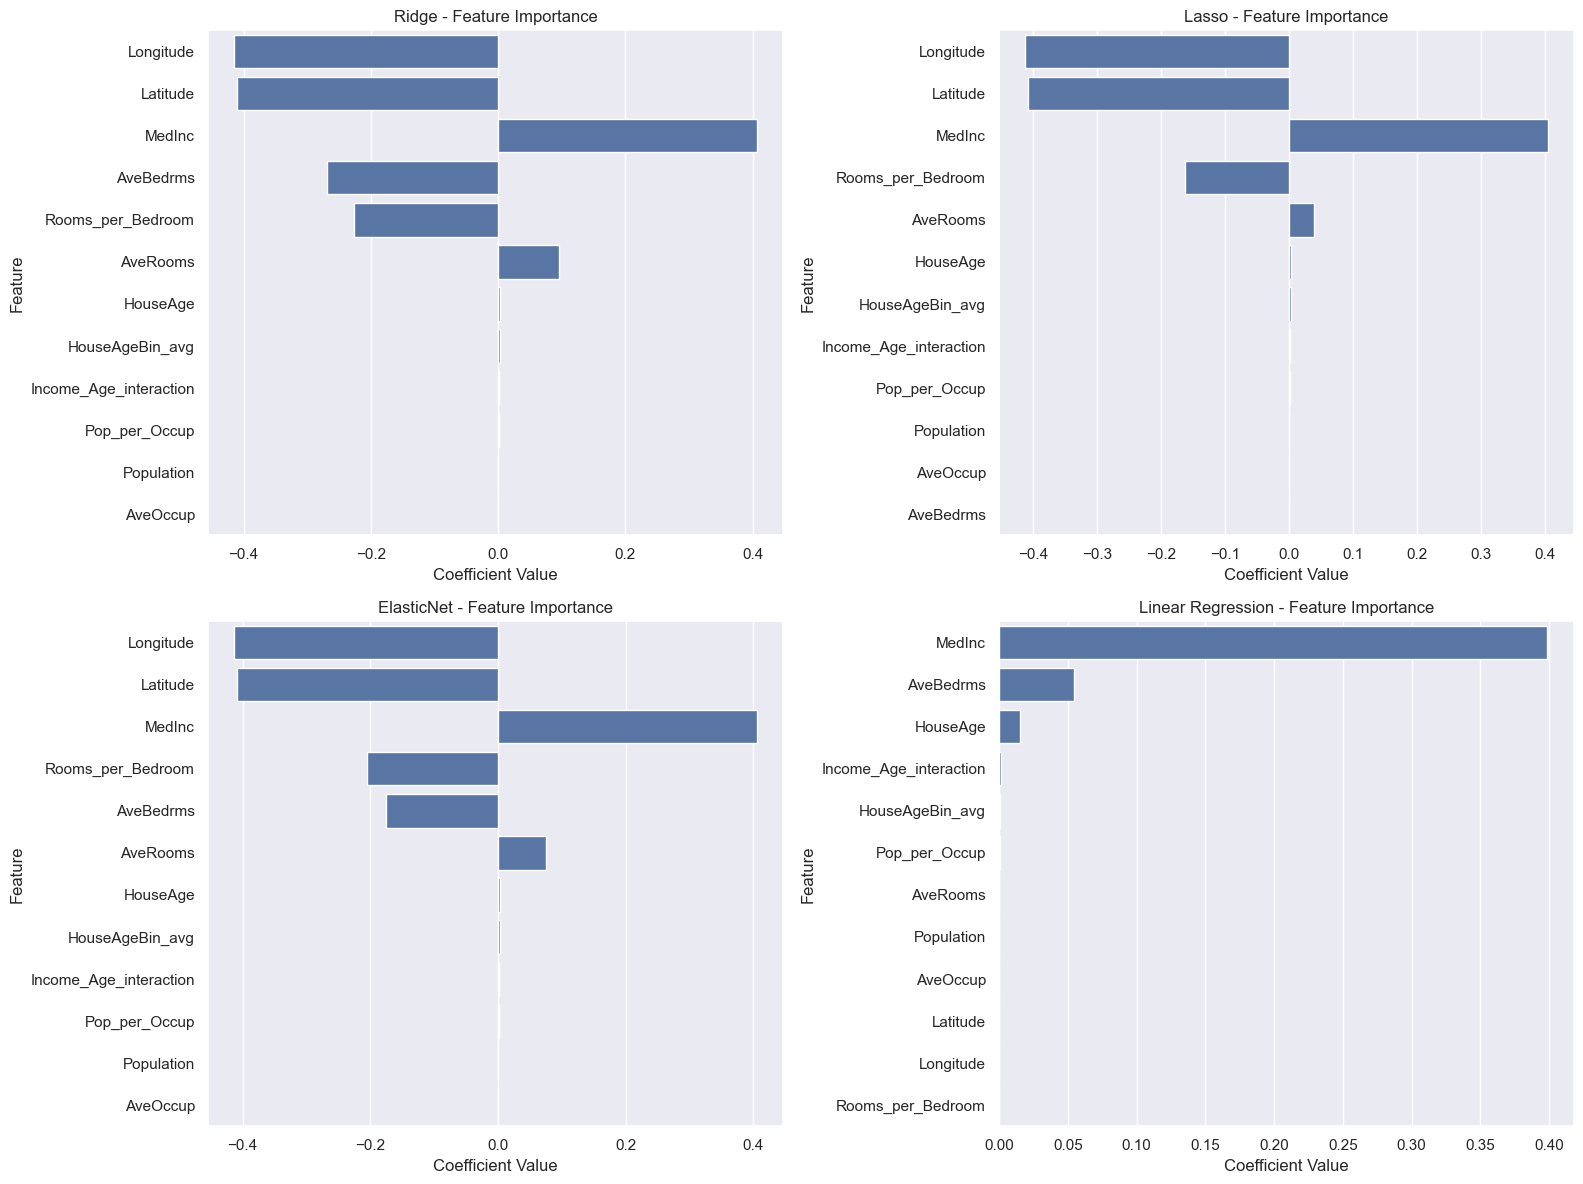

In [31]:
# -----------------------------
# Plot Feature Importances
# -----------------------------
 # List of models for which we want to plot feature importances
#Each feature has a coefficient (weight):
#Positive coefficient: Increases the target (price)
#Negative coefficient: Decreases the target
def plot_feature_importances(results, feature_names):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, (name, result) in enumerate(results.items()):
        coefs = result['coefs']
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefs
        }).sort_values(by='Importance', key=abs, ascending=False)

        sns.barplot(x='Importance', y='Feature', data=coef_df, ax=axes[idx])
        axes[idx].set_title(f"{name} - Feature Importance")
        axes[idx].set_xlabel('Coefficient Value')
        axes[idx].set_ylabel('Feature')

    plt.tight_layout()
    plt.show()

plot_feature_importances(results, feature_names)

## Part 5 - Apply on test and show model performance estimation

📊 Best Model: Ridge
   Test MSE:   0.4723
   Test RMSE: 0.6873
   Test R²:   0.6518

🔍 First 5 Predicted vs Actual House Prices:
   🏠 Predicted Price: 3.0530   |   Actual Price: 3.8520
   🏠 Predicted Price: 2.8058   |   Actual Price: 2.4570
   🏠 Predicted Price: 2.7901   |   Actual Price: 2.0130
   🏠 Predicted Price: 1.3335   |   Actual Price: 1.0520
   🏠 Predicted Price: 0.4343   |   Actual Price: 1.0780


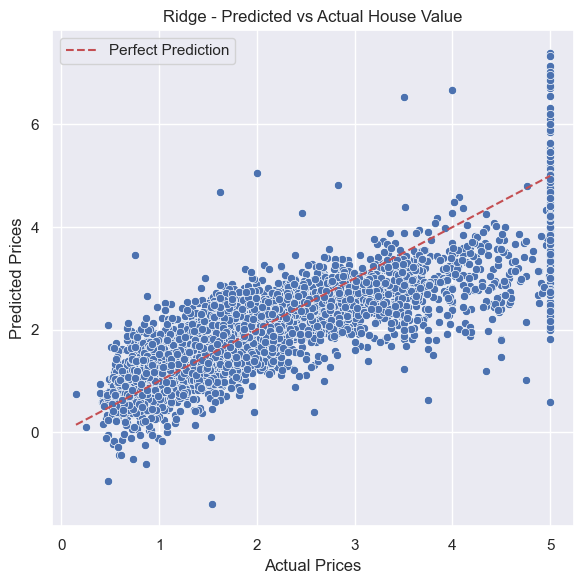

In [33]:
def plot_best_model_predictions2(results, X_test, y_test):
    # Find the model with the lowest RMSE
    best_model_name = min(results, key=lambda name: results[name]['rmse'])
    best_model = results[best_model_name]['model']
    y_pred = best_model.predict(X_test)

   # Compute metrics
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = results[best_model_name]['rmse']
    test_r2 = results[best_model_name]['r2']

    # Print evaluation metrics
    print(f"📊 Best Model: {best_model_name}")
    print(f"   Test MSE:   {test_mse:.4f}")
    print(f"   Test RMSE: {test_rmse:.4f}")
    print(f"   Test R²:   {test_r2:.4f}")
    
    # Print first 5 predicted vs actual house prices
    print("\n🔍 First 5 Predicted vs Actual House Prices:")
    for i in range(5):
        print(f"   🏠 Predicted Price: {y_pred[i]:.4f}   |   Actual Price: {y_test.iloc[i]:.4f}")

    # Plot predicted vs actual
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f"{best_model_name} - Predicted vs Actual House Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_best_model_predictions2(results,X_test,y_test)